In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_squared_log_error, \
mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

In [2]:
df = pd.read_csv('../data/TG_STAID002759.txt', sep=',', comment='%', skiprows=18, skipfooter=10)

C:\Users\Affetheking\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
52854,111448,20200916,221,0
52855,111448,20200917,146,0
52856,111448,20200918,130,0
52857,111448,20200919,144,0


In [4]:
df.columns = ["SOUID", "DATE", "TG", "Q_TG"]

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['day'] = df['DATE'].dt.day

In [6]:
df.set_index('DATE', inplace=True)
df.head()

,SOUID,TG,Q_TG,month,year,day
DATE,,,,,,
1876-01-01,127488,22,0,1,1876,1
1876-01-02,127488,25,0,1,1876,2
1876-01-03,127488,3,0,1,1876,3
1876-01-04,127488,-58,0,1,1876,4
1876-01-05,127488,-98,0,1,1876,5


In [7]:
df.isin([-9999]).sum()

SOUID      0
TG       195
Q_TG       0
month      0
year       0
day        0
dtype: int64

In [8]:
df.loc[df['TG'] == -9999]

,SOUID,TG,Q_TG,month,year,day
DATE,,,,,,
1945-04-25,127488,-9999,9,4,1945,25
1945-04-26,127488,-9999,9,4,1945,26
1945-04-27,127488,-9999,9,4,1945,27
1945-04-28,127488,-9999,9,4,1945,28
1945-04-29,127488,-9999,9,4,1945,29
...,...,...,...,...,...,...
1945-11-01,127488,-9999,9,11,1945,1
1945-11-02,127488,-9999,9,11,1945,2
1945-11-03,127488,-9999,9,11,1945,3


In [9]:
may_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 5)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 5)]['TG'].mean())) / 2

In [10]:
june_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 6)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 6)]['TG'].mean())) / 2

In [11]:
july_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 7)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 7)]['TG'].mean())) / 2

In [12]:
august_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 8)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 8)]['TG'].mean())) / 2

In [13]:
september_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 9)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 9)]['TG'].mean())) / 2

In [14]:
october_39_50 = ((df.loc[((1939 <= df['year']) & (df['year'] <= 1944)) & (df['month'] == 10)]['TG'].mean()) + \
(df.loc[((1946 <= df['year']) & (df['year'] <= 1950)) & (df['month'] == 10)]['TG'].mean())) / 2

In [15]:
df.loc[(df['year'] == 1945) & (df['month'] == 5), 'TG'] = may_39_50

In [16]:
df.loc[(df['year'] == 1945) & (df['month'] == 6), 'TG'] = june_39_50

In [17]:
df.loc[(df['year'] == 1945) & (df['month'] == 7), 'TG'] = july_39_50

In [18]:
df.loc[(df['year'] == 1945) & (df['month'] == 8), 'TG'] = august_39_50

In [19]:
df.loc[(df['year'] == 1945) & (df['month'] == 9), 'TG'] = september_39_50

In [20]:
df.loc[(df['year'] == 1945) & (df['month'] == 10), 'TG'] = october_39_50

In [21]:
df = df.where(df!=-9999, np.nan)

In [22]:
df.loc[(df['year'] == 1945) & (df['month'] == 4)] = df.loc[(df['year'] == 1945) & (df['month'] == 4)]\
.fillna(method='ffill')

In [23]:
df.loc[(df['year'] == 1945) & (df['month'] == 11)] = df.loc[(df['year'] == 1945) & (df['month'] == 11)]\
.fillna(method='bfill')

In [24]:
df.isin([-9999]).sum(), df.isna().sum()

(SOUID    0
 TG       0
 Q_TG     0
 month    0
 year     0
 day      0
 dtype: int64,
 SOUID    0
 TG       0
 Q_TG     0
 month    0
 year     0
 day      0
 dtype: int64)

In [25]:
df.loc[(df['year'] == 1945)]

,SOUID,TG,Q_TG,month,year,day
DATE,,,,,,
1945-01-01,127488,-28.0,0,1,1945,1
1945-01-02,127488,-22.0,0,1,1945,2
1945-01-03,127488,17.0,0,1,1945,3
1945-01-04,127488,22.0,0,1,1945,4
1945-01-05,127488,-18.0,0,1,1945,5
...,...,...,...,...,...,...
1945-12-27,127488,44.0,0,12,1945,27
1945-12-28,127488,61.0,0,12,1945,28
1945-12-29,127488,32.0,0,12,1945,29


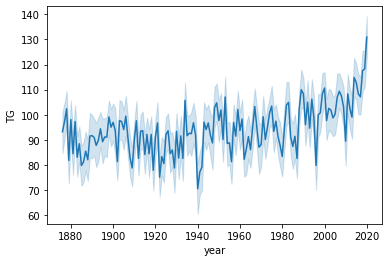

In [26]:
#%matplotlib notebook
sns.lineplot(data=df, x='year', y="TG")

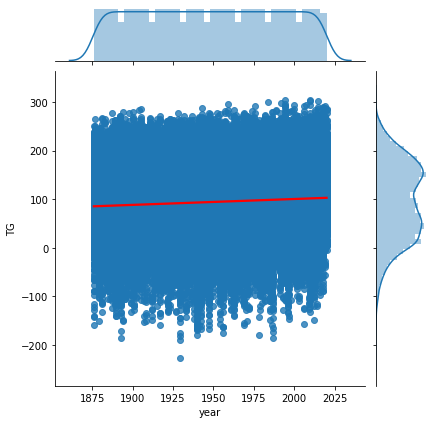

In [27]:
sns.jointplot(data=df, x='year', y="TG", kind='reg', joint_kws={'line_kws':{'color':'red'}})

## Decomposing to Components

We decompose the time series into its components to be able to model the different components separately \
before adding them for the final model together.

### a. diff function to find all changes

The diff function gives you the differences between consecutive elements (time steps). \
It is the opposite of the cumulative sum. 

In [28]:
df['diff'] = df['TG'].diff()
df.head()

,SOUID,TG,Q_TG,month,year,day,diff
DATE,,,,,,,
1876-01-01,127488,22.0,0,1,1876,1,NaN
1876-01-02,127488,25.0,0,1,1876,2,3.0
1876-01-03,127488,3.0,0,1,1876,3,-22.0
1876-01-04,127488,-58.0,0,1,1876,4,-61.0
1876-01-05,127488,-98.0,0,1,1876,5,-40.0


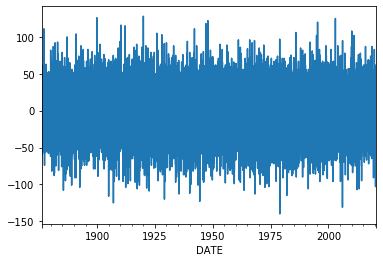

In [29]:
df['diff'].plot()

In [30]:
df['diff'].mean() # what does this mean? how do i read this?

0.0025918498618941314

## Im not sure if my data is heteroscedastic (meaning that the variance is changing, bad)

if it is, Percentage Change is a way to deal with that.

In [31]:
df['pct_change'] = df['TG'].pct_change()
df.head()

,SOUID,TG,Q_TG,month,year,day,diff,pct_change
DATE,,,,,,,,
1876-01-01,127488,22.0,0,1,1876,1,NaN,NaN
1876-01-02,127488,25.0,0,1,1876,2,3.0,0.136364
1876-01-03,127488,3.0,0,1,1876,3,-22.0,-0.880000
1876-01-04,127488,-58.0,0,1,1876,4,-61.0,-20.333333
1876-01-05,127488,-98.0,0,1,1876,5,-40.0,0.689655


In [32]:
f_index = list(df.loc[(df['pct_change'] == -np.inf) | (df['pct_change'].isna()) | (df['pct_change'] == np.inf)].index)

In [34]:
f_index

[Timestamp('1876-01-01 00:00:00'),
 Timestamp('1876-02-08 00:00:00'),
 Timestamp('1876-11-14 00:00:00'),
 Timestamp('1877-12-29 00:00:00'),
 Timestamp('1879-11-19 00:00:00'),
 Timestamp('1882-01-18 00:00:00'),
 Timestamp('1883-03-03 00:00:00'),
 Timestamp('1883-12-11 00:00:00'),
 Timestamp('1887-02-08 00:00:00'),
 Timestamp('1888-03-23 00:00:00'),
 Timestamp('1889-02-07 00:00:00'),
 Timestamp('1889-12-17 00:00:00'),
 Timestamp('1890-12-09 00:00:00'),
 Timestamp('1891-02-08 00:00:00'),
 Timestamp('1892-01-08 00:00:00'),
 Timestamp('1892-11-21 00:00:00'),
 Timestamp('1892-12-03 00:00:00'),
 Timestamp('1892-12-06 00:00:00'),
 Timestamp('1893-03-19 00:00:00'),
 Timestamp('1893-12-29 00:00:00'),
 Timestamp('1894-12-15 00:00:00'),
 Timestamp('1895-01-16 00:00:00'),
 Timestamp('1896-01-26 00:00:00'),
 Timestamp('1896-01-30 00:00:00'),
 Timestamp('1896-11-26 00:00:00'),
 Timestamp('1896-12-21 00:00:00'),
 Timestamp('1898-02-06 00:00:00'),
 Timestamp('1899-01-02 00:00:00'),
 Timestamp('1899-01-

In [ ]:
#date = pd.date_range('2004-01-01', '2018-01-01', freq="AS")    # your code

#freq = 'D'                                                     # 'H' for hours, etc.
#date = date + pd.Timedelta(3, unit=freq)                       # Perform the action
#print(date)

In [35]:
t_index = []
for i in f_index:
    freq = 'D'
    x = i + pd.Timedelta(-1, unit=freq) 
    t_index.append(x)

In [36]:
df.loc[df.index.isin(t_index), ['TG']] = 1

In [37]:
df['pct_change'] = df['TG'].pct_change()
df.head()

,SOUID,TG,Q_TG,month,year,day,diff,pct_change
DATE,,,,,,,,
1876-01-01,127488,22.0,0,1,1876,1,NaN,NaN
1876-01-02,127488,25.0,0,1,1876,2,3.0,0.136364
1876-01-03,127488,3.0,0,1,1876,3,-22.0,-0.880000
1876-01-04,127488,-58.0,0,1,1876,4,-61.0,-20.333333
1876-01-05,127488,-98.0,0,1,1876,5,-40.0,0.689655


In [52]:
df.head()

,SOUID,TG,Q_TG,month,year,day,diff,pct_change
DATE,,,,,,,,
1876-01-01,127488,22.0,0,1,1876,1,NaN,NaN
1876-01-02,127488,25.0,0,1,1876,2,3.0,0.136364
1876-01-03,127488,3.0,0,1,1876,3,-22.0,-0.880000
1876-01-04,127488,-58.0,0,1,1876,4,-61.0,-20.333333
1876-01-05,127488,-98.0,0,1,1876,5,-40.0,0.689655


In [55]:
df = df.drop(df.index[0])

In [56]:
df.loc[df.index.isin(t_index)]

,SOUID,TG,Q_TG,month,year,day,diff,pct_change
DATE,,,,,,,,
1876-02-07,127488,1.0,0,2,1876,7,8.0,-1.125000
1876-11-13,127488,1.0,0,11,1876,13,39.0,-1.025641
1877-12-28,127488,1.0,0,12,1877,28,-5.0,-0.800000
1879-11-18,127488,1.0,0,11,1879,18,-14.0,-0.928571
1882-01-17,127488,1.0,0,1,1882,17,5.0,-1.200000
...,...,...,...,...,...,...,...,...
2017-01-22,111448,1.0,0,1,2017,22,-19.0,-0.947368
2018-02-20,111448,1.0,0,2,2018,20,-17.0,-0.941176
2018-12-15,111448,1.0,0,12,2018,15,-4.0,-0.750000


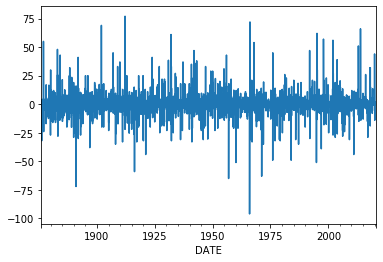

In [57]:
df['pct_change'].plot() # what does this mean, why is this good?

In [58]:
df['pct_change'].mean() #this should tell us the average change in temeprature per day

0.002220769380850906

#### Other option: Relative Change with logarithm

It also takes care of heteroscedasticity

In [59]:
#df['log'] = np.log(df['TG']) 
#df.head(100) # division by zero, i definitely need to talk about this, pass on log

In [60]:
# cant take log of negative, for perc_chang if temperature = 0 use 0.01 instead (or so)
# so i pass on log for the moment

In [61]:
#df['log'].plot()

In [62]:
#df['log'].isna().sum()

### b. Trend

The trend is the shift in your data over time. the above is also used to determine the trend.

## rolling mean

In [63]:
#df.groupby(['month']).mean()

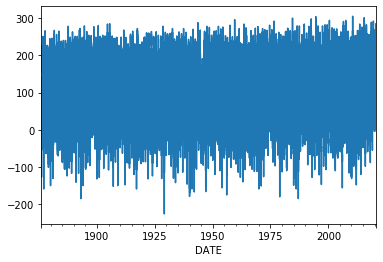

In [64]:
df['TG'].plot()

In [65]:
df['rolling'] = df['TG'].rolling(window=365).mean()

In [66]:
df

,SOUID,TG,Q_TG,month,year,day,diff,pct_change,rolling
DATE,,,,,,,,,
1876-01-02,127488,25.0,0,1,1876,2,3.0,0.136364,NaN
1876-01-03,127488,3.0,0,1,1876,3,-22.0,-0.880000,NaN
1876-01-04,127488,-58.0,0,1,1876,4,-61.0,-20.333333,NaN
1876-01-05,127488,-98.0,0,1,1876,5,-40.0,0.689655,NaN
1876-01-06,127488,-77.0,0,1,1876,6,21.0,-0.214286,NaN
...,...,...,...,...,...,...,...,...,...
2020-09-16,111448,221.0,0,9,2020,16,-11.0,-0.047414,117.610959
2020-09-17,111448,146.0,0,9,2020,17,-75.0,-0.339367,117.690411
2020-09-18,111448,130.0,0,9,2020,18,-16.0,-0.109589,117.736986


## Seasonality

Seasonality is about reoccuring patterns in your time series.

### How can we get the seasonality?

In [67]:
df['TG_wo_Trend'] = df['TG'] - df['rolling']

In [68]:
df['seasonal'] = df['TG_wo_Trend'].rolling(window=30).mean()

In [69]:
df['residual'] = df['TG'] - df['rolling'] - df['seasonal']

In [70]:
df

,SOUID,TG,Q_TG,month,year,day,diff,pct_change,rolling,TG_wo_Trend,seasonal,residual
DATE,,,,,,,,,,,,
1876-01-02,127488,25.0,0,1,1876,2,3.0,0.136364,NaN,NaN,NaN,NaN
1876-01-03,127488,3.0,0,1,1876,3,-22.0,-0.880000,NaN,NaN,NaN,NaN
1876-01-04,127488,-58.0,0,1,1876,4,-61.0,-20.333333,NaN,NaN,NaN,NaN
1876-01-05,127488,-98.0,0,1,1876,5,-40.0,0.689655,NaN,NaN,NaN,NaN
1876-01-06,127488,-77.0,0,1,1876,6,21.0,-0.214286,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-16,111448,221.0,0,9,2020,16,-11.0,-0.047414,117.610959,103.389041,71.552877,31.836164
2020-09-17,111448,146.0,0,9,2020,17,-75.0,-0.339367,117.690411,28.309589,69.360639,-41.051050
2020-09-18,111448,130.0,0,9,2020,18,-16.0,-0.109589,117.736986,12.263014,66.568676,-54.305662


# Begin of Linear Autoregression

### first i build a simple version from scratch & then i do it more properly.

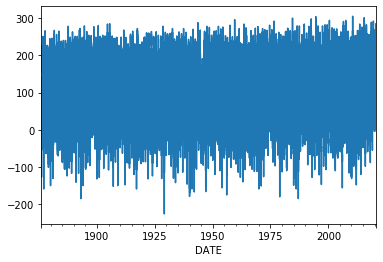

In [71]:
df['TG'].plot()

### autoregression model 

In [72]:
# therefore we create columns that "lag behind" the present column \
# for the first try ill do it with a lag of two days

In [73]:
for i in range(1,4):
    print(i)
    df[f'TG - {i}days'] = df['TG'].shift(i)

1
2
3


In [74]:
df.head(3)

,SOUID,TG,Q_TG,month,year,day,diff,pct_change,rolling,TG_wo_Trend,seasonal,residual,TG - 1days,TG - 2days,TG - 3days
DATE,,,,,,,,,,,,,,,
1876-01-02,127488,25.0,0,1,1876,2,3.0,0.136364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876-01-03,127488,3.0,0,1,1876,3,-22.0,-0.880000,NaN,NaN,NaN,NaN,25.0,NaN,NaN
1876-01-04,127488,-58.0,0,1,1876,4,-61.0,-20.333333,NaN,NaN,NaN,NaN,3.0,25.0,NaN


In [75]:
#sns.heatmap(df.corr())

In [76]:
features = ['TG - 1days','TG - 2days', 'TG - 3days' ]

### Train-Test Split:
were going to do a tt-split as always:
- Last 2000 days -> Testing
- All days except the Last 2000 -> Training

In [77]:
df.dropna(inplace=True) # this is necessary, because the lag creates two rows with NaNs

In [78]:
X_train = df.iloc[:-2000][features]
X_test = df.iloc[-2000:][features]

y_train = df.iloc[:-2000]['TG']
y_test = df.iloc[-2000:]['TG']

In [79]:
df.head(5)

,SOUID,TG,Q_TG,month,year,day,diff,pct_change,rolling,TG_wo_Trend,seasonal,residual,TG - 1days,TG - 2days,TG - 3days
DATE,,,,,,,,,,,,,,,
1877-01-29,127488,37.0,0,1,1877,29,28.0,3.111111,97.726027,-60.726027,-64.010320,3.284292,9.0,-45.0,-36.0
1877-01-30,127488,38.0,0,1,1877,30,1.0,0.027027,97.821918,-59.821918,-65.157626,5.335708,37.0,9.0,-45.0
1877-01-31,127488,24.0,0,1,1877,31,-14.0,-0.368421,97.920548,-73.920548,-67.535525,-6.385023,38.0,37.0,9.0
1877-02-01,127488,10.0,0,2,1877,1,-14.0,-0.583333,97.942466,-87.942466,-69.275799,-18.666667,24.0,38.0,37.0
1877-02-02,127488,7.0,0,2,1877,2,-3.0,-0.300000,97.939726,-90.939726,-69.941918,-20.997808,10.0,24.0,38.0


In [80]:
X_train.head(5)

,TG - 1days,TG - 2days,TG - 3days
DATE,,,
1877-01-29,9.0,-45.0,-36.0
1877-01-30,37.0,9.0,-45.0
1877-01-31,38.0,37.0,9.0
1877-02-01,24.0,38.0,37.0
1877-02-02,10.0,24.0,38.0


In [81]:
y_test.head(5)

DATE
2015-04-01    46.0
2015-04-02    33.0
2015-04-03    49.0
2015-04-04    44.0
2015-04-05    48.0
Name: TG, dtype: float64

### VERSION 1: LINEAR REGRESSION
    
    Make X data with lags, y data with current value and fit with linear regression.

In [82]:
m_lr = LinearRegression()

In [83]:
m_lr.fit(X_train, y_train)

LinearRegression()

In [84]:
ypred = m_lr.predict(X_test)

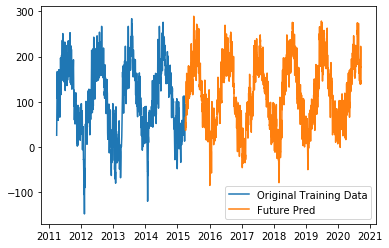

In [85]:
plt.plot(X_train['TG - 1days'].iloc[49000:]) # looks good so far
plt.plot(X_test.index, ypred)
#plt.plot(X_test, ar_pred,'-.')
plt.legend(['Original Training Data', 'Future Pred'])#,'AR'])

### Statsmodels Linear Autoregression

In [86]:
y_train.tail()

DATE
2015-03-27    73.0
2015-03-28    71.0
2015-03-29    95.0
2015-03-30    64.0
2015-03-31    59.0
Name: TG, dtype: float64

In [87]:
y_test.tail()

DATE
2020-09-16    221.0
2020-09-17    146.0
2020-09-18    130.0
2020-09-19    144.0
2020-09-20    159.0
Name: TG, dtype: float64

In [103]:
m = AutoReg(y_train, lags=3)

res = m.fit()
ar_pred = res.predict(start='2015-04-01', end='2020-09-20')

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                     TG   No. Observations:                50465
Model:                     AutoReg(3)   Log Likelihood             -230360.281
Method:               Conditional MLE   S.D. of innovations             23.245
Date:                Fri, 20 Nov 2020   AIC                              6.292
Time:                        15:30:40   BIC                              6.293
Sample:                    02-01-1877   HQIC                             6.293
                         - 03-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7724      0.163     23.191      0.000       3.454       4.091
TG.L1          1.0076      0.004    229.244      0.000       0.999       1.016
TG.L2         -0.2067      0.006    -33.272      0.0

C:\Users\Affetheking\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [104]:
ar_pred

2015-04-01   NaN
2015-04-02   NaN
2015-04-03   NaN
2015-04-04   NaN
2015-04-05   NaN
              ..
2020-09-16   NaN
2020-09-17   NaN
2020-09-18   NaN
2020-09-19   NaN
2020-09-20   NaN
Freq: D, Length: 2000, dtype: float64

In [105]:
res.params, m_lr.coef_, m_lr.intercept_ # almost identically to our own linear regression with lag

(intercept    3.772365
 TG.L1        1.007578
 TG.L2       -0.206688
 TG.L3        0.158646
 dtype: float64,
 array([ 1.0076191 , -0.20673969,  0.15865072]),
 3.773259039846451)

## evaluation

In [106]:
#first try:
# MSE: 519.903509095533
# MAE: 18.070234399714945
#R2: 0.9099603475081572
# RMSE: 22.801392700787662

In [107]:
# MSE
mse = mean_squared_error(y_test, ypred)
mse 

493.2853956083539

In [108]:
# MAE
mae = mean_absolute_error(y_test, ypred)
mae

17.604977231794507

In [109]:
#R2
r2 = r2_score(y_test, ypred) # very good score id say, but we need to evaluate this.
r2

0.9145702138515168

In [110]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, ypred))
rmse

22.210029167210788

In [111]:
# RMSLE doesnt work because of negative values
#rmsle = np.sqrt(mean_squared_log_error(y_test, ypred))
#rmsle

In [112]:
predictions = []
for i in range(len(y_train), len(df)):
    predictions.append(res.params[0] + \
                       sum(df.TG[i:i+1].values * res.params[:0:-1].values))  

In [113]:
# with the line above we should have made prediction from the end of train to the end of the dataset

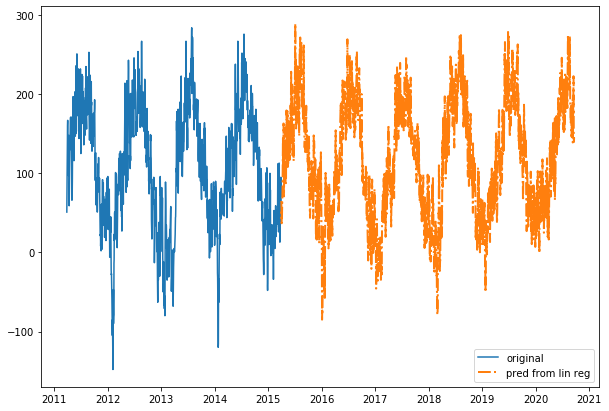

In [117]:
plt.figure(figsize=(10,7))
plt.plot(y_train.iloc[49000:],label='original')
#plt.plot(ar_pred, label = 'pred from train')
#plt.plot(y_test.index,predictions, 'm',label = 'walk forward', linewidth = 2)
plt.plot(y_test.index,ypred,'-.',label = 'pred from lin reg',linewidth = 2)


plt.legend()

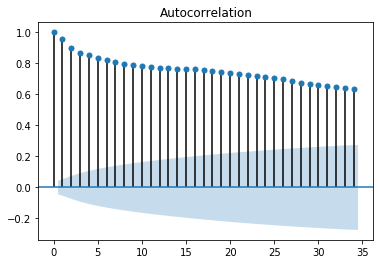

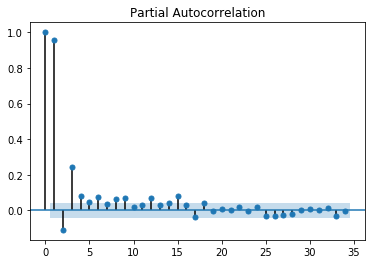

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(pd.DataFrame(predictions));
plot_pacf(pd.DataFrame(predictions));

# cross validation

In [144]:
ts_split = TimeSeriesSplit()

In [145]:
#X_train is the years
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

#y_train is the temperature
y_train = np.array(y_train).reshape(-1,1)

In [146]:
X_train.shape, X_test.shape, y_train.shape

((151395, 1), (6000, 1), (50465, 1))

In [147]:
list(ts_split.split(X_train))


[(array([    0,     1,     2, ..., 25232, 25233, 25234]),
  array([25235, 25236, 25237, ..., 50464, 50465, 50466])),
 (array([    0,     1,     2, ..., 50464, 50465, 50466]),
  array([50467, 50468, 50469, ..., 75696, 75697, 75698])),
 (array([    0,     1,     2, ..., 75696, 75697, 75698]),
  array([ 75699,  75700,  75701, ..., 100928, 100929, 100930])),
 (array([     0,      1,      2, ..., 100928, 100929, 100930]),
  array([100931, 100932, 100933, ..., 126160, 126161, 126162])),
 (array([     0,      1,      2, ..., 126160, 126161, 126162]),
  array([126163, 126164, 126165, ..., 151392, 151393, 151394]))]

In [148]:
train_index, validation_index = list(ts_split.split(X_train))[0]

In [149]:
train_index.shape, validation_index.shape

((25235,), (25232,))

In [150]:
print(f'The data for training are between {X_train[train_index].min(),X_train[train_index].max()}')

The data for training are between (-185.0, 279.0)


In [151]:
X_train[validation_index]

array([[ -2.],
       [-46.],
       [-22.],
       ...,
       [-56.],
       [-43.],
       [-53.]])

In [153]:
ypred.shape, y_train[validation_index].shape

IndexError: index 50465 is out of bounds for axis 0 with size 50465

In [128]:
mape = sum(abs((y_train[validation_index] - ypred ) / \
               y_train[validation_index])) * 100 / \
len(y_train[validation_index])
mape

IndexError: index 75699 is out of bounds for axis 0 with size 50465

In [129]:
mses = []

for train_index, validation_index in ts_split.split(X_train):
    print(f'\n The training period are the years: {min(X_train[train_index])} to {max(X_train[train_index])}')
    print(f'The validation (test) period are the years: {min(X_train[validation_index])} to {max(X_train[validation_index])}')

    model = LinearRegression()
    model.fit(X_train[train_index], y_train[train_index])
    
    # careful that you call the X_train but with the validation_index
    ypred = model.predict(X_train[validation_index])
    mse = mean_squared_error(y_train[validation_index], ypred)
    mape = sum(abs((y_train[validation_index] - ypred ) / \
               y_train[validation_index])) * 100 / \
               len(y_train[validation_index])  
    
    print(f'The mean squared error for the validation set is: {mse}')
    mses.append(mse)
    print(f'The mean abs perc. error for the validation set is: {mape}')
    mses.append(mape)


 The training period are the years: [-185.] to [279.]
The validation (test) period are the years: [-159.] to [285.]


IndexError: index 50465 is out of bounds for axis 0 with size 50465